In [1]:
import pandas as pd

df = pd.read_csv("HR Data.csv")
df

,Attrition,Business_Travel,CF_age_band,CF_attrition_label,Department,Education_Field,emp_no,Employee_Number,Gender,Job_Role,...,Stock_Option_Level,Total_Working_Years,Work_Life_Balance,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Curr_Manager,Attribution_Rate,Active_Employees,Attribution_Count
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,0,8,1,6,4,0,5,0,0,1
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,1,10,3,10,7,1,7,1,1,0
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,0,7,3,0,0,0,0,0,0,1
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,0,8,3,8,7,3,0,1,1,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,1,6,3,2,2,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Yes,Non-Travel,25 - 34,Ex-Employees,R&D,Technical Degree,STAFF-1905,1905,Male,Research Scientist,...,1,5,3,5,2,3,0,1,0,1
1466,Yes,Travel_Frequently,25 - 34,Ex-Employees,R&D,Life Sciences,STAFF-1868,1868,Male,Research Scientist,...,0,1,2,1,0,1,0,1,0,1
1467,Yes,Travel_Frequently,35 - 44,Ex-Employees,Sales,Other,STAFF-1667,1667,Male,Sales Executive,...,0,13,4,11,9,6,7,1,0,1
1468,Yes,Travel_Rarely,Under 25,Ex-Employees,R&D,Life Sciences,STAFF-1878,1878,Male,Research Scientist,...,0,1,3,1,0,0,0,1,0,1


In [2]:
#Total Employees
print("Total Employees:", df.shape[0])

Total Employees: 1470


In [3]:
#Count By Department
dept_counts = df['Department'].value_counts()
print(dept_counts)

R&D      961
Sales    446
HR        63
Name: Department, dtype: int64


In [4]:
#Attrition Rate by Gender
Attrition_by_gender = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
print(attrition_by_gender)

Attrition         No        Yes
Gender                         
Female     85.204082  14.795918
Male       82.993197  17.006803


In [5]:
#Average Monthly Income by Job Role
income_by_role = df.groupby('Job_Role')['Monthly_Income'].mean().sort_values(ascending=False)
print(income_by_role)

Job_Role
Manager                      17181.676471
Research Director            16033.550000
Healthcare Representative     7528.763359
Manufacturing Director        7295.137931
Sales Executive               6924.279141
Human Resources               4235.750000
Research Scientist            3239.972603
Laboratory Technician         3237.169884
Sales Representative          2626.000000
Name: Monthly_Income, dtype: float64


In [26]:
#Top 5 Job Roles with Highest Attrition Rate
role_attrition = df[df['Attrition'] == 'Yes'].groupby('Job_Role').size() / df.groupby('Job_Role').size() * 100
top_roles = role_attrition.sort_values(ascending=False).head(5)
print(top_roles)

Job_Role
Sales Representative     39.759036
Laboratory Technician    23.938224
Human Resources          23.076923
Sales Executive          17.484663
Research Scientist       16.095890
dtype: float64


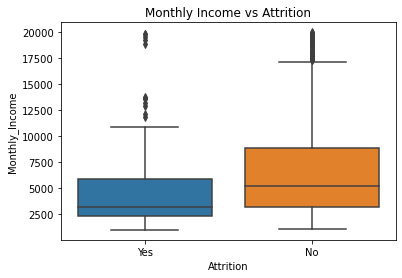

In [18]:
#Attrition By Monthly Income
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Attrition', y='Monthly_Income', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()

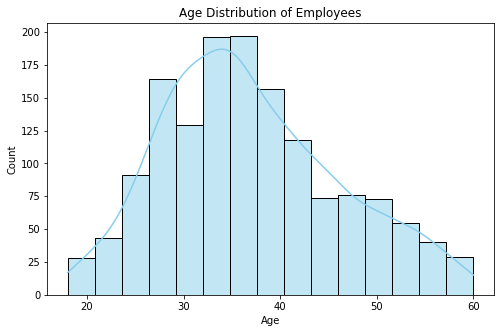

In [7]:
#Plot Age Distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

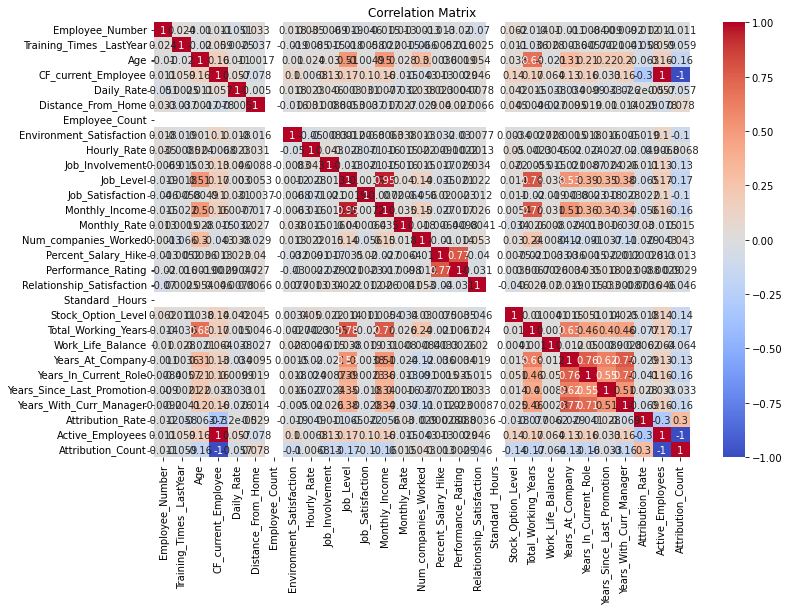

In [17]:
#Correlation Heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annoTrue, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
summary = df.groupby('Department').agg({
    'Attrition': 'mean',
    'MonthlyIncome': 'mean',
    'Age': 'mean'
})
summary.to_csv('monthly_HR_summary.csv')
print("Monthly summary exported.")